<span style="color:blue">

##  Descriptive analysis of Variables
### 1. Data Summary
### 2. Data cleansing
### 3. Encoding categorical attributes
### 4. Data Correlation
### 5. Data Analysis
### 6. Scatter plots

In [1]:
# pre-approved-denied.csv contains all claim approved and denied cases
# CSV don't conatin any null or missing entries.. 
# If there are any missing entries either we can remove it or impute it. 
# Imputing can be done by replacing null value with mean or median.. 
# one other way of imputing is to substitue the null value with the most frequent values in the dataset

import pandas as pd 
df = pd.read_csv("pre-approved-denied.csv") 
df.head(5)

,ClmID,PriBenefGrade,BenefAge,Age_Band,Sex,Lenght of Stay,ClmAmount,ClmApprovedAmt,Settled_Amt_Band,Approved Amt Before deduction,...,Consultant Charges Claimed,Consultant Charges Paid,Package Rate Claimed,Package Rate Paid,Excess of Defined Ailment Limit,Policy Excess,Hospital Discount,Patient Paid Amount,Deduction Amt,Insurer_Status
0,14301382,Associate,0,0-18,M,4,12873,11030,10001-25000,12873,...,2400,2400,0,0,0,0,1843,0,0,Approved
1,14324426,Associate,0,0-18,M,3,12046,10112,10001-25000,11894,...,1600,1600,0,0,0,0,1782,0,152,Approved
2,14353580,Senior Associate,0,0-18,F,4,25847,23130,10001-25000,25700,...,0,0,0,0,0,0,2570,0,147,Approved
3,14354256,Senior Associate,0,0-18,M,2,17209,13965,10001-25000,15609,...,0,0,0,0,0,0,476,1168,1600,Approved
4,14362279,0,29,26-30,F,6,76610,75449,50001-100000,76610,...,0,0,0,0,0,0,1161,0,0,Approved


In [2]:
df.dtypes

ClmID                                     int64
PriBenefGrade                            object
BenefAge                                  int64
Age_Band                                 object
Sex                                      object
Lenght of Stay                            int64
ClmAmount                                 int64
ClmApprovedAmt                            int64
Settled_Amt_Band                         object
Approved Amt Before deduction             int64
Incurred Amount                           int64
Basic_Sum_Insured                         int64
Sum_Insured                               int64
Balance Sum Insured                       int64
Ailment_code                             object
Ailment_Grp                              object
Illness                                  object
Procedure Type(Surgical/Non-Surgical)    object
HospID                                    int64
HospName                                 object
CityName                                

In [3]:
# Need to decode categorical attributes
# function to obtain Categorical Features

def _get_categorical_features(df):
    feats = [col for col in list(df.columns) if df[col].dtype == 'object']
    return feats

# function to factorize categorical features
def _factorize_categoricals(df, cats):
    for col in cats:
        df[col], _ = pd.factorize(df[col])
    return df 

# function to create dummy variables of categorical features
#def _get_dummies(df, cats):
#    for col in cats:
#        df = pd.concat([df, pd.get_dummies(df[col], prefix=col)], axis=1)
#    return df 



In [4]:
df_cats = _get_categorical_features(df)


In [5]:
train_df = _factorize_categoricals( df, df_cats)
train_df.head()

#train_df = _get_dummies( df, df_cats)
train_df.head()
#train_df.drop(['claim_month','claim_year','age_of_driver_buckets','safty_rating_buckets','vehicle_weight_buckets','annual_income_buckets','gender','living_status','claim_day_of_week','accident_site','channel','vehicle_category','vehicle_color','marital_status','high_education_ind','address_change_ind','witness_present_ind','zip_code','policy_report_filed_ind','vehicle_price_buckets','age_of_vehicle_buckets'],axis=1,inplace=True)
#train_df.head()
#train_df.dtypes
train_df.to_csv('CleanDataNew.csv',index=False)

In [6]:
# The attributes having positive correlations with target attribute i.e Insurer_Status
# can be good predictors.
import matplotlib.pyplot as plt
import seaborn as sns
corr=train_df.corr()
corr

,ClmID,PriBenefGrade,BenefAge,Age_Band,Sex,Lenght of Stay,ClmAmount,ClmApprovedAmt,Settled_Amt_Band,Approved Amt Before deduction,...,Consultant Charges Claimed,Consultant Charges Paid,Package Rate Claimed,Package Rate Paid,Excess of Defined Ailment Limit,Policy Excess,Hospital Discount,Patient Paid Amount,Deduction Amt,Insurer_Status
ClmID,1.000000,0.079401,0.195134,0.311662,0.155479,-0.197007,-0.191220,-0.078816,-0.046275,-0.136057,...,0.011993,0.010702,0.013195,0.013165,-0.069968,-0.192596,-0.139995,-0.084808,-0.141852,-0.200515
PriBenefGrade,0.079401,1.000000,0.235258,0.207606,-0.094330,0.100975,0.101671,0.097956,0.012658,0.116611,...,0.020029,0.022143,-0.016033,-0.015843,0.020150,0.104674,0.030094,-0.038092,-0.039714,-0.042073
BenefAge,0.195134,0.235258,1.000000,0.497628,-0.237059,-0.138641,-0.004814,0.033902,0.159036,0.007032,...,0.001640,0.004832,0.007034,0.006880,0.041676,-0.054409,-0.013004,-0.117236,-0.046480,0.082502
Age_Band,0.311662,0.207606,0.497628,1.000000,0.061181,-0.124065,-0.014396,0.051215,0.026068,0.006684,...,0.084039,0.080779,-0.032472,-0.032007,-0.007669,-0.110075,0.006133,-0.071308,-0.050251,-0.018344
Sex,0.155479,-0.094330,-0.237059,0.061181,1.000000,-0.048300,-0.004971,0.020207,-0.068499,0.019001,...,0.012310,0.011170,0.076159,0.076614,-0.051222,0.018704,-0.082466,-0.069976,-0.048081,-0.096993
Lenght of Stay,-0.197007,0.100975,-0.138641,-0.124065,-0.048300,1.000000,0.414637,0.364178,-0.081559,0.421359,...,0.263711,0.266281,0.019562,0.019061,-0.024140,0.313039,0.340262,0.271944,0.011970,-0.110948
ClmAmount,-0.191220,0.101671,-0.004814,-0.014396,-0.004971,0.414637,1.000000,0.891533,0.029654,0.953801,...,0.451908,0.455774,0.477442,0.476411,0.128949,0.587364,0.581572,0.305834,0.154393,-0.045503
ClmApprovedAmt,-0.078816,0.097956,0.033902,0.051215,0.020207,0.364178,0.891533,1.000000,-0.114121,0.942912,...,0.482262,0.485520,0.517721,0.517380,0.022265,0.301506,0.552984,0.325745,-0.105689,-0.255646
Settled_Amt_Band,-0.046275,0.012658,0.159036,0.026068,-0.068499,-0.081559,0.029654,-0.114121,1.000000,-0.112187,...,-0.125227,-0.121720,0.008272,0.008589,-0.058246,-0.034297,-0.073057,-0.092419,0.435150,0.748163
Approved Amt Before deduction,-0.136057,0.116611,0.007032,0.006684,0.019001,0.421359,0.953801,0.942912,-0.112187,1.000000,...,0.480153,0.483810,0.488011,0.486975,0.140072,0.595932,0.600919,0.319581,-0.128019,-0.235394


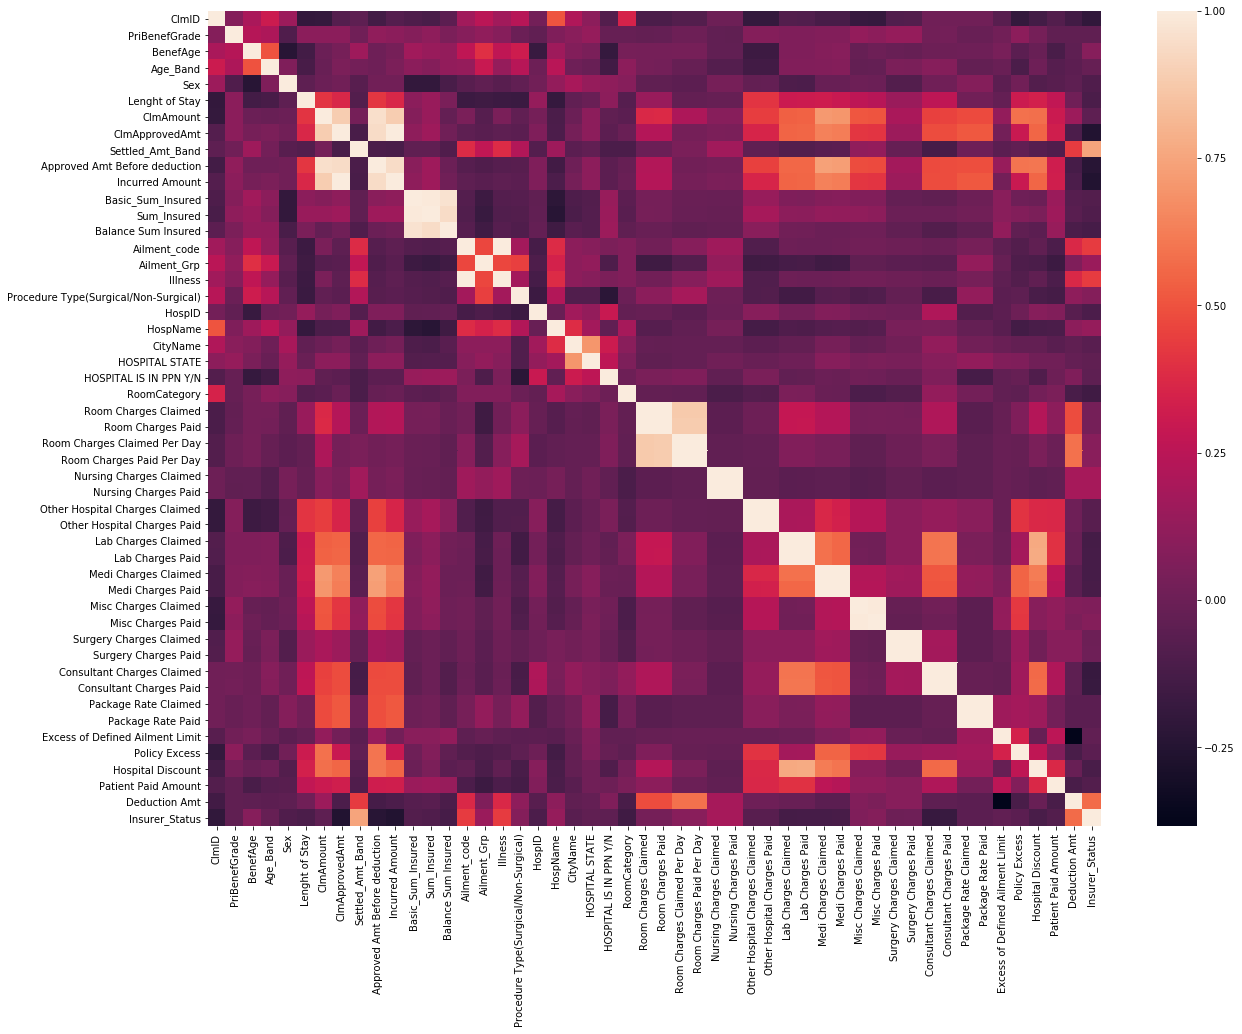

In [7]:
plt.figure(figsize=(20,15))
sns.heatmap(corr, 
        xticklabels=corr.columns,
        yticklabels=corr.columns)


In [8]:
# Describe gives you count by which we come to know if there are any null entries
# mean
# Std- standard deviation
# 25% 75% - First quartile and 3/4 quartile of data
# 50%- median of data
# max value
# we can get skewness of data: 
## mean and median are same= not skewed 
## mean is greater than median right skewed i.e positively skewed
## mean is lesser than median left skewed i.e negatively skewed

df.describe()

,ClmID,PriBenefGrade,BenefAge,Age_Band,Sex,Lenght of Stay,ClmAmount,ClmApprovedAmt,Settled_Amt_Band,Approved Amt Before deduction,...,Consultant Charges Claimed,Consultant Charges Paid,Package Rate Claimed,Package Rate Paid,Excess of Defined Ailment Limit,Policy Excess,Hospital Discount,Patient Paid Amount,Deduction Amt,Insurer_Status
count,2.840000e+02,284.000000,284.000000,284.000000,284.000000,284.000000,284.000000,284.000000,284.000000,284.000000,...,284.000000,284.000000,284.000000,284.000000,284.000000,284.000000,284.000000,284.000000,284.000000,284.000000
mean,1.484920e+07,1.816901,42.584507,3.577465,0.556338,4.500000,61141.785211,44943.936620,4.021127,51568.105634,...,4911.007042,4826.947183,10416.228873,10379.292254,944.718310,4347.714789,1665.172535,201.834507,8929.651408,0.144366
std,2.136157e+05,0.833230,26.037006,3.105504,0.497693,5.291837,92065.377543,72341.288142,4.388337,90144.771289,...,11312.981670,11233.834985,44092.992167,43988.556351,11207.997821,30352.689469,5826.646079,987.915858,29982.424773,0.352081
min,1.427344e+07,0.000000,0.000000,0.000000,0.000000,1.000000,100.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-184810.000000,0.000000
25%,1.472562e+07,1.000000,28.000000,1.000000,0.000000,1.000000,16248.000000,6871.000000,0.000000,7696.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.490516e+07,2.000000,55.000000,3.000000,1.000000,3.000000,32000.000000,22117.500000,2.000000,22997.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1044.000000,0.000000
75%,1.501417e+07,2.000000,64.000000,6.000000,1.000000,5.000000,64562.000000,50093.500000,6.250000,53627.250000,...,4850.000000,4800.000000,0.000000,0.000000,0.000000,0.000000,1041.000000,0.000000,4601.000000,0.000000
max,1.516623e+07,5.000000,84.000000,13.000000,1.000000,34.000000,681843.000000,559000.000000,12.000000,658130.000000,...,97910.000000,97910.000000,559000.000000,559000.000000,185160.000000,321047.000000,65091.000000,9053.000000,330000.000000,1.000000


In [9]:
# We are interested in approved-denied cases
# 0-approved cases-243
# 3-denied cases-41

import pandas as pd 
df = pd.read_csv("CleanDataNew.csv") 
df.head(5)

,ClmID,PriBenefGrade,BenefAge,Age_Band,Sex,Lenght of Stay,ClmAmount,ClmApprovedAmt,Settled_Amt_Band,Approved Amt Before deduction,...,Consultant Charges Claimed,Consultant Charges Paid,Package Rate Claimed,Package Rate Paid,Excess of Defined Ailment Limit,Policy Excess,Hospital Discount,Patient Paid Amount,Deduction Amt,Insurer_Status
0,14301382,0,0,0,0,4,12873,11030,0,12873,...,2400,2400,0,0,0,0,1843,0,0,0
1,14324426,0,0,0,0,3,12046,10112,0,11894,...,1600,1600,0,0,0,0,1782,0,152,0
2,14353580,1,0,0,1,4,25847,23130,0,25700,...,0,0,0,0,0,0,2570,0,147,0
3,14354256,1,0,0,0,2,17209,13965,0,15609,...,0,0,0,0,0,0,476,1168,1600,0
4,14362279,2,29,1,1,6,76610,75449,1,76610,...,0,0,0,0,0,0,1161,0,0,0


In [10]:
# Get some insights of data

# Hospitals which are in PPN
# 0 -PPN
# 1-NOT PPN
df.groupby(['HOSPITAL IS IN PPN Y/N','Insurer_Status'])['Insurer_Status'].count()


HOSPITAL IS IN PPN Y/N  Insurer_Status
0                       0                 139
                        1                  26
1                       0                 104
                        1                  15
Name: Insurer_Status, dtype: int64

Text(0.5, 1.0, 'Insurer_Status')

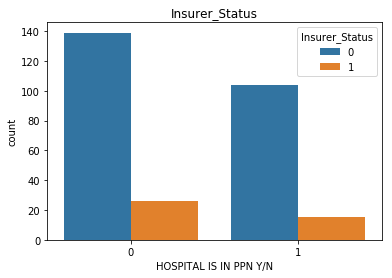

In [11]:

fig, ax = plt.subplots()
sns.countplot('HOSPITAL IS IN PPN Y/N',hue='Insurer_Status',data=df)
ax.set_title('Insurer_Status')

In [12]:
# Analysis with primary benefitiary grade
# the grades are like Associate, Director/expert, Manager, senior associate etc.
df.groupby(['PriBenefGrade','Insurer_Status'])['Insurer_Status'].count()

#fig, ax = plt.subplots()
#sns.countplot('HOSPITAL IS IN PPN Y/N',hue='Insurer_Status',data=df)
#ax.set_title('Insurer_Status')
df["PriBenefGrade"].value_counts()

2    188
1     58
4     17
0     17
3      3
5      1
Name: PriBenefGrade, dtype: int64

Text(0.5, 1.0, 'Insurer_Status')

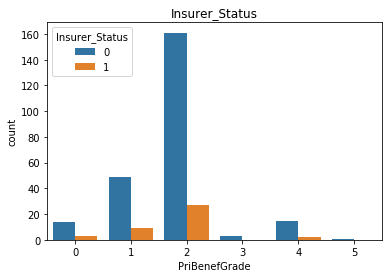

In [13]:
fig, ax = plt.subplots()
sns.countplot('PriBenefGrade',hue='Insurer_Status',data=df)
ax.set_title('Insurer_Status')

In [14]:
# Analysis with age-band
df.groupby(['Age_Band','Insurer_Status'])['Insurer_Status'].count()


Age_Band  Insurer_Status
0         0                 53
          1                  8
1         0                 24
          1                  3
2         0                 41
          1                 10
3         0                  7
          1                  2
4         0                 26
          1                  5
5         0                 23
          1                  3
6         0                 20
          1                  6
7         0                 16
8         0                 20
          1                  2
9         0                  4
10        0                  3
11        0                  1
12        0                  5
          1                  1
13        1                  1
Name: Insurer_Status, dtype: int64

Text(0.5, 1.0, 'Insurer_Status')

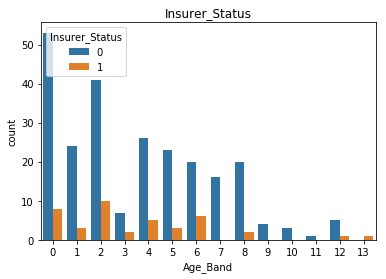

In [15]:
fig, ax = plt.subplots()
sns.countplot('Age_Band',hue='Insurer_Status',data=df)
ax.set_title('Insurer_Status')

In [16]:
# Analysis with settled amount band
df.groupby(['Settled_Amt_Band','Insurer_Status'])['Insurer_Status'].count()


Settled_Amt_Band  Insurer_Status
0                 0                 73
1                 0                 39
2                 0                 56
3                 0                 15
4                 0                  3
5                 0                  6
6                 0                 21
7                 0                  6
8                 0                  1
9                 0                  1
10                0                 15
11                0                  7
12                1                 41
Name: Insurer_Status, dtype: int64

Text(0.5, 1.0, 'Insurer_Status')

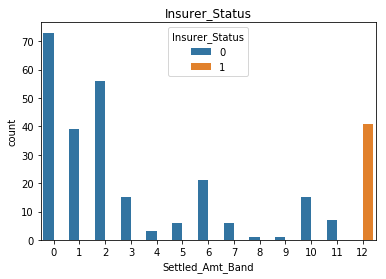

In [17]:
# All the approved cases have settled amount band
# settled amount bad 12 indicates 0 band hence all the denied cases falls in that band since 
#don't have any band value.

fig, ax = plt.subplots()
sns.countplot('Settled_Amt_Band',hue='Insurer_Status',data=df)
ax.set_title('Insurer_Status')

In [18]:
# Sex-wise analysis
df.groupby(['Sex','Insurer_Status'])['Insurer_Status'].count()


Sex  Insurer_Status
0    0                 103
     1                  23
1    0                 140
     1                  18
Name: Insurer_Status, dtype: int64

Text(0.5, 1.0, 'Insurer_Status')

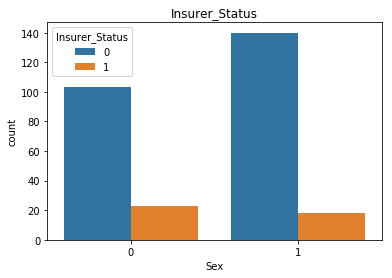

In [19]:
fig, ax = plt.subplots()
sns.countplot('Sex',hue='Insurer_Status',data=df)
ax.set_title('Insurer_Status')

In [20]:
# Procedure type wise analysis
df.groupby(['Procedure Type(Surgical/Non-Surgical)','Insurer_Status'])['Insurer_Status'].count()


Procedure Type(Surgical/Non-Surgical)  Insurer_Status
0                                      0                 105
                                       1                  17
1                                      0                  20
2                                      0                  20
                                       1                   5
3                                      0                   1
4                                      0                  39
                                       1                   7
5                                      0                   2
                                       1                   3
6                                      0                   7
7                                      0                   5
                                       1                   1
8                                      0                   1
9                                      0                  11
10                             

Text(0.5, 1.0, 'Insurer_Status')

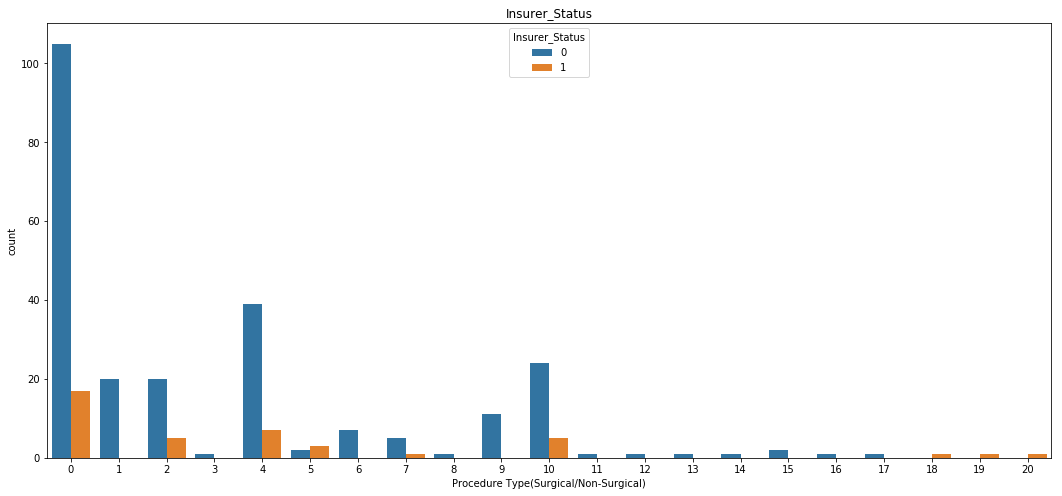

In [21]:
fig, ax = plt.subplots(figsize=(18,8))
sns.countplot('Procedure Type(Surgical/Non-Surgical)',hue='Insurer_Status',data=df)
ax.set_title('Insurer_Status')

In [22]:
# Aliment_Grp wise analysis
df.groupby(['Ailment_Grp','Insurer_Status'])['Insurer_Status'].count()


Ailment_Grp  Insurer_Status
0            0                 44
             1                  3
1            0                 21
2            0                  6
             1                  2
3            0                 10
4            0                 31
             1                 12
5            0                  6
             1                  2
6            0                  9
7            0                 10
             1                  3
8            0                  5
9            0                 12
10           0                  3
11           0                 21
             1                  2
12           0                  1
13           0                  5
14           0                 10
15           0                  6
16           0                 25
             1                  8
17           0                  6
18           0                  1
             1                  2
19           0                  3
             1      

Text(0.5, 1.0, 'Insurer_Status')

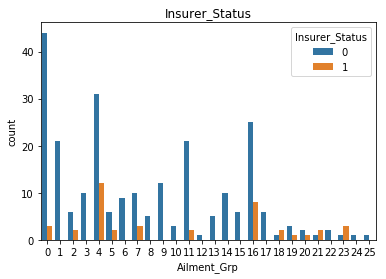

In [23]:
fig, ax = plt.subplots()
sns.countplot('Ailment_Grp',hue='Insurer_Status',data=df)
ax.set_title('Insurer_Status')

In [24]:
# City wise analysis
df.groupby(['CityName','Insurer_Status'])['Insurer_Status'].count()


CityName  Insurer_Status
0         0                 34
          1                  9
1         0                 31
          1                 13
2         0                 45
          1                  7
3         0                 23
          1                  5
4         0                 29
          1                  2
5         0                 10
6         0                  2
7         0                  1
8         0                 12
9         0                  3
10        0                  1
11        0                  2
12        0                  3
13        0                  2
14        0                  1
15        0                  1
16        0                  2
17        0                  2
18        0                  2
          1                  1
19        0                  1
20        0                  2
21        0                  1
22        0                  2
          1                  1
23        0                  4
24        0   

Text(0.5, 1.0, 'Insurer_Status')

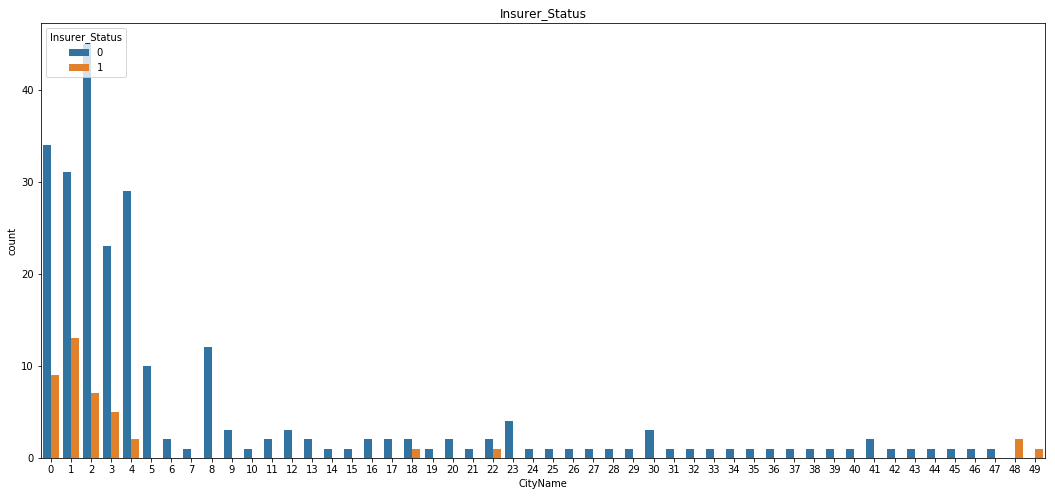

In [25]:
fig, ax = plt.subplots(figsize=(18,8))
sns.countplot('CityName',hue='Insurer_Status',data=df)
ax.set_title('Insurer_Status')

In [26]:
# Ailment_code wise analysis
df.groupby(['Ailment_code','Insurer_Status'])['Insurer_Status'].count()


Ailment_code  Insurer_Status
0             0                  7
1             0                  6
2             0                 16
3             0                 21
4             0                  3
5             0                  4
6             0                  6
              1                  1
7             0                  1
8             0                  1
9             0                  2
10            0                  1
11            0                  3
12            0                  2
13            0                 12
              1                  3
14            0                  4
              1                  1
15            0                  1
16            0                  7
17            0                  2
18            0                  1
19            0                  1
20            0                  1
21            0                  1
22            0                  1
23            0                 11
24            0           

Text(0.5, 1.0, 'Insurer_Status')

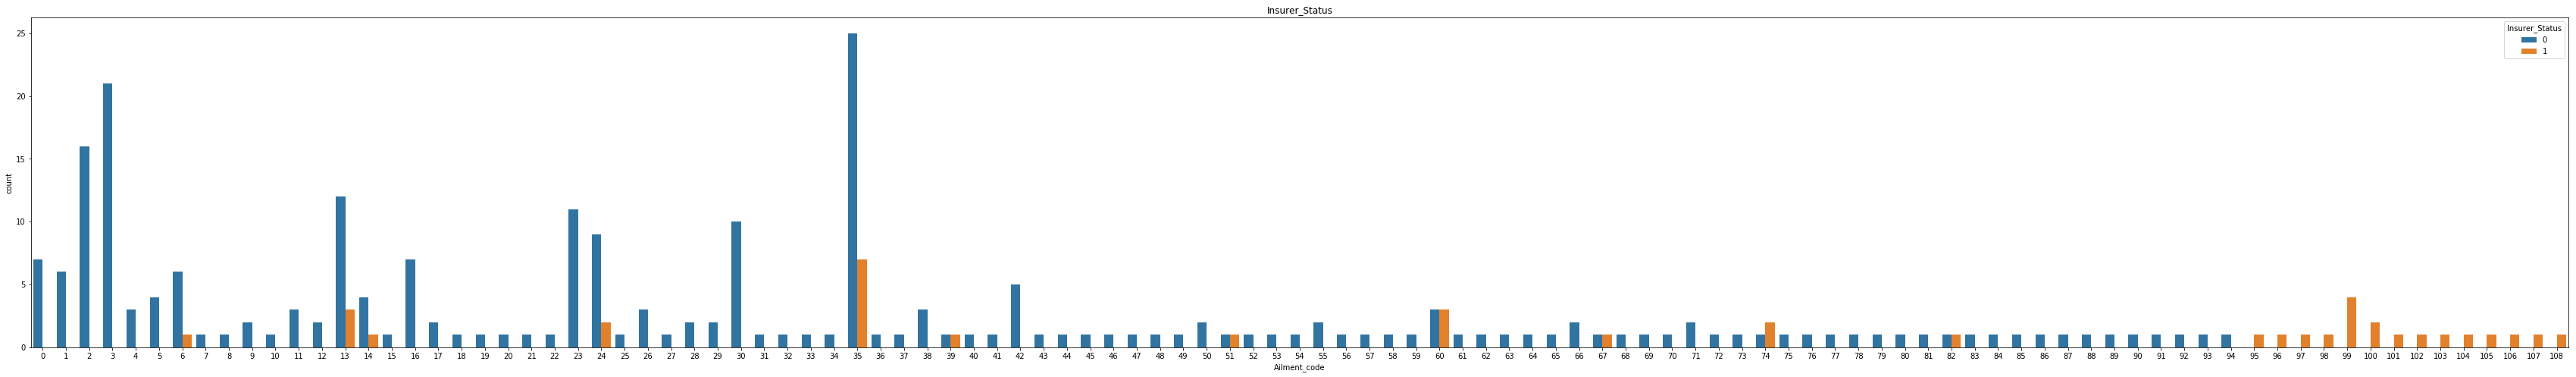

In [27]:
fig, ax = plt.subplots(figsize=(60,8))
sns.countplot('Ailment_code',hue='Insurer_Status',data=df)
ax.set_title('Insurer_Status')

In [28]:
# Hospital statewise analysis
df.groupby(['HOSPITAL STATE','Insurer_Status'])['Insurer_Status'].count()


HOSPITAL STATE  Insurer_Status
0               0                 58
                1                 14
1               0                 44
                1                 13
2               0                 49
                1                  8
3               0                 39
                1                  2
4               0                  2
5               0                  4
6               0                 25
7               0                 11
8               0                  1
9               0                  2
10              0                  2
11              0                  2
                1                  1
12              0                  1
13              0                  2
14              0                  1
15              1                  2
16              1                  1
Name: Insurer_Status, dtype: int64

Text(0.5, 1.0, 'Insurer_Status')

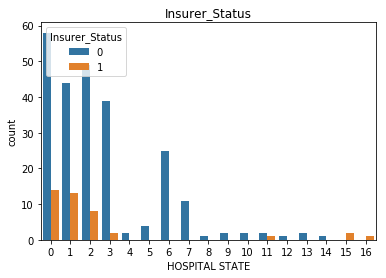

In [29]:
fig, ax = plt.subplots()
sns.countplot('HOSPITAL STATE',hue='Insurer_Status',data=df)
ax.set_title('Insurer_Status')

In [30]:
# Hospital name wise analysis
df.groupby(['HospName','Insurer_Status'])['Insurer_Status'].count()


HospName  Insurer_Status
0         0                 2
1         0                 2
2         0                 4
3         0                 3
          1                 1
4         0                 3
5         0                 8
          1                 1
6         0                 2
          1                 1
7         0                 3
8         0                 1
9         0                 2
10        0                 4
          1                 1
11        0                 1
12        0                 1
13        0                 1
14        0                 9
15        0                 2
          1                 1
16        0                 4
          1                 1
17        0                 8
18        0                 1
19        0                 1
20        0                 1
21        0                 1
22        0                 1
23        0                 2
                           ..
118       0                 1
119       0    

Text(0.5, 1.0, 'Insurer_Status')

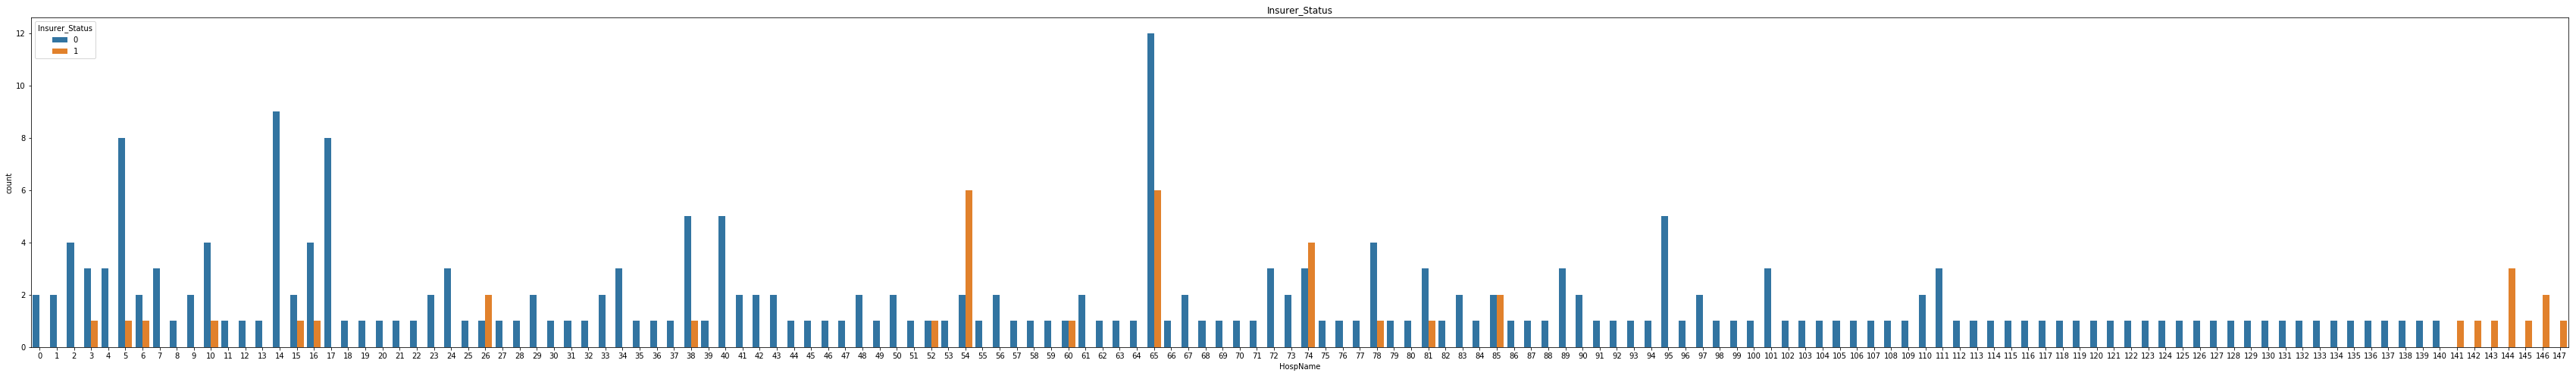

In [31]:
fig, ax = plt.subplots(figsize=(60,8))
sns.countplot('HospName',hue='Insurer_Status',data=df)
ax.set_title('Insurer_Status')

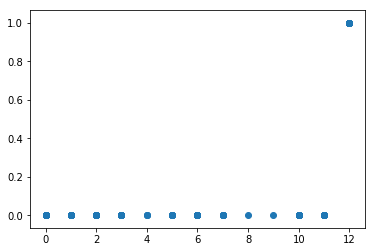

In [32]:
# Scatter plots

plt.scatter(df.Settled_Amt_Band,df.Insurer_Status)